# TEST

3.358077767865344 2.094858313888548 0.3005948504109601 -1.2561394755007635


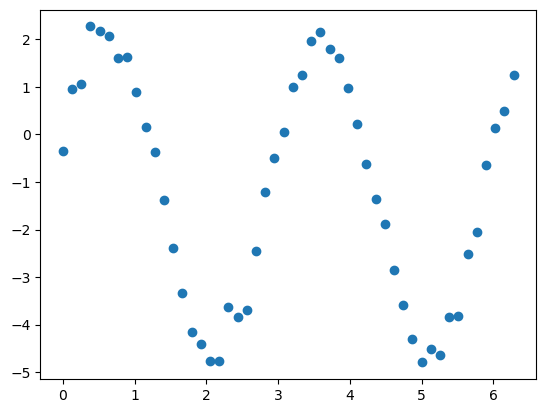

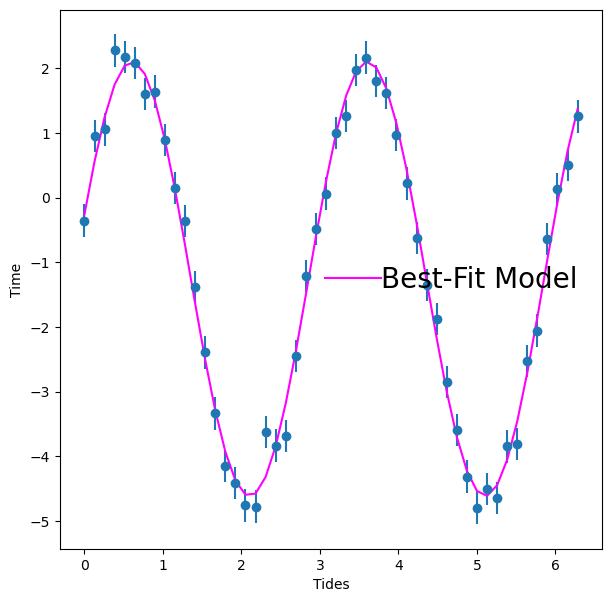

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline

#define x and y
npoints = 50
x = np.linspace(0,2*np.pi,npoints)

a = 3.4
b = 2.1
c = 0.27
d = -1.3

#assuming this is where we check for the experimental error
sigma = 0.25
np.random.seed(120)

#create y and y error
y = a * np.sin(b*x+c) + d + np.random.normal(scale=sigma,size=npoints)
#make an array that is 0.25 for each element
#plot plots with matplotlib scatter for the data
#use plot for the model
y_err = np.full(npoints, sigma)
plt.scatter(x, y)

# Find Best fit model

def f_line(x, a, b, c, d):
    return a * np.sin(b*x + c) + d

params, params_cov = optimize.curve_fit(f_line,x,y,sigma=y_err,p0=[1,2,0.1,-0.1])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

print(a_fit,b_fit,c_fit,d_fit)

y_fit = a_fit * np.sin(b_fit * x + c_fit) + d_fit

# Plot data and best fit model together

plt.figure(figsize=(7, 7))
plt.errorbar(x,y,y_err,fmt='o')
plt.xlabel('Tides')
plt.ylabel('Time')
plt.plot(x,y_fit,color='magenta',label='Best-Fit Model')

plt.legend(frameon=False,fontsize=20,handletextpad=0)
plt.show()

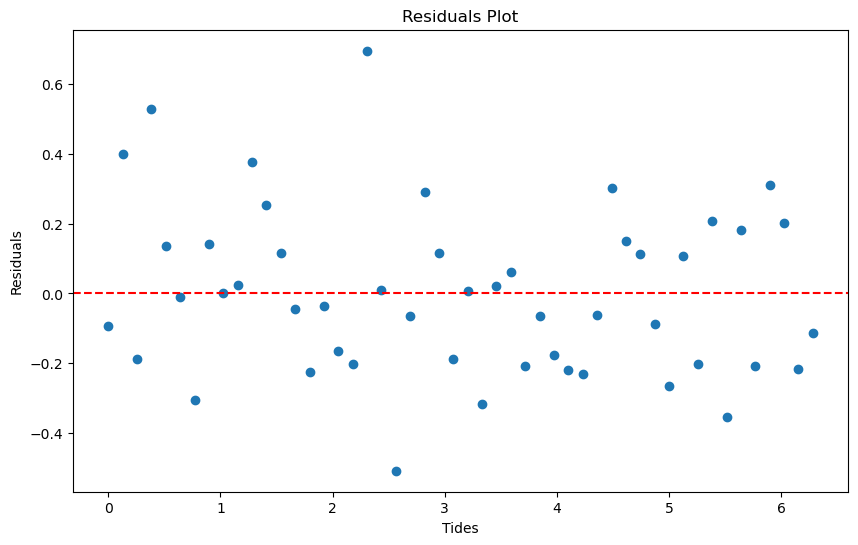

Standard Deviation of Residuals: 0.23707880663479947


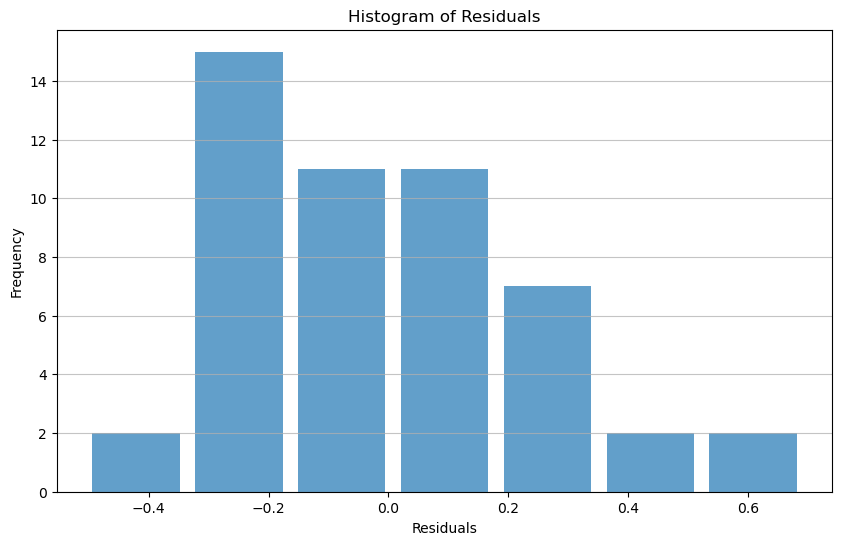

In [2]:
# Subtract the best-fit model from the data to get residuals
residuals = y - y_fit

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(x, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Tides')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Calculate the standard deviation of the residuals
std_deviation = np.std(residuals)
print(f'Standard Deviation of Residuals: {std_deviation}')

# Plot a histogram of the residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins='auto', alpha=0.7, rwidth=0.85)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(axis='y', alpha=0.75)
plt.savefig('residuals_histogram.pdf')
plt.show()